In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
from matplotlib import pyplot as plt
import numpy as np

import camb
from camb import model, initialpower
import pandas as pd

plt.rcdefaults()

In [2]:
import importlib.util
import sys
spec = importlib.util.spec_from_file_location(
    "spectra", "../shared/spectra.py")
spectra = importlib.util.module_from_spec(spec)
sys.modules["spectra"] = spectra
spec.loader.exec_module(spectra)

In [3]:
omega_index = 0 # while we debug, we confine our attention to just one value
onh2 = spectra.omegas_nu[omega_index]
onh2_str = spectra.omnu_strings[omega_index]

In [4]:
# It's a waste of time to consider all of the omegas and snapshots, so we're
# making heavy use of skips.
spec_sims = spectra.better_battery(spectra.omegas_nu, spectra.omnu_strings,
    skips_omega = [1, 2], skips_model=[8], skips_snapshot=[1, 2, 3],
    h_units=False)

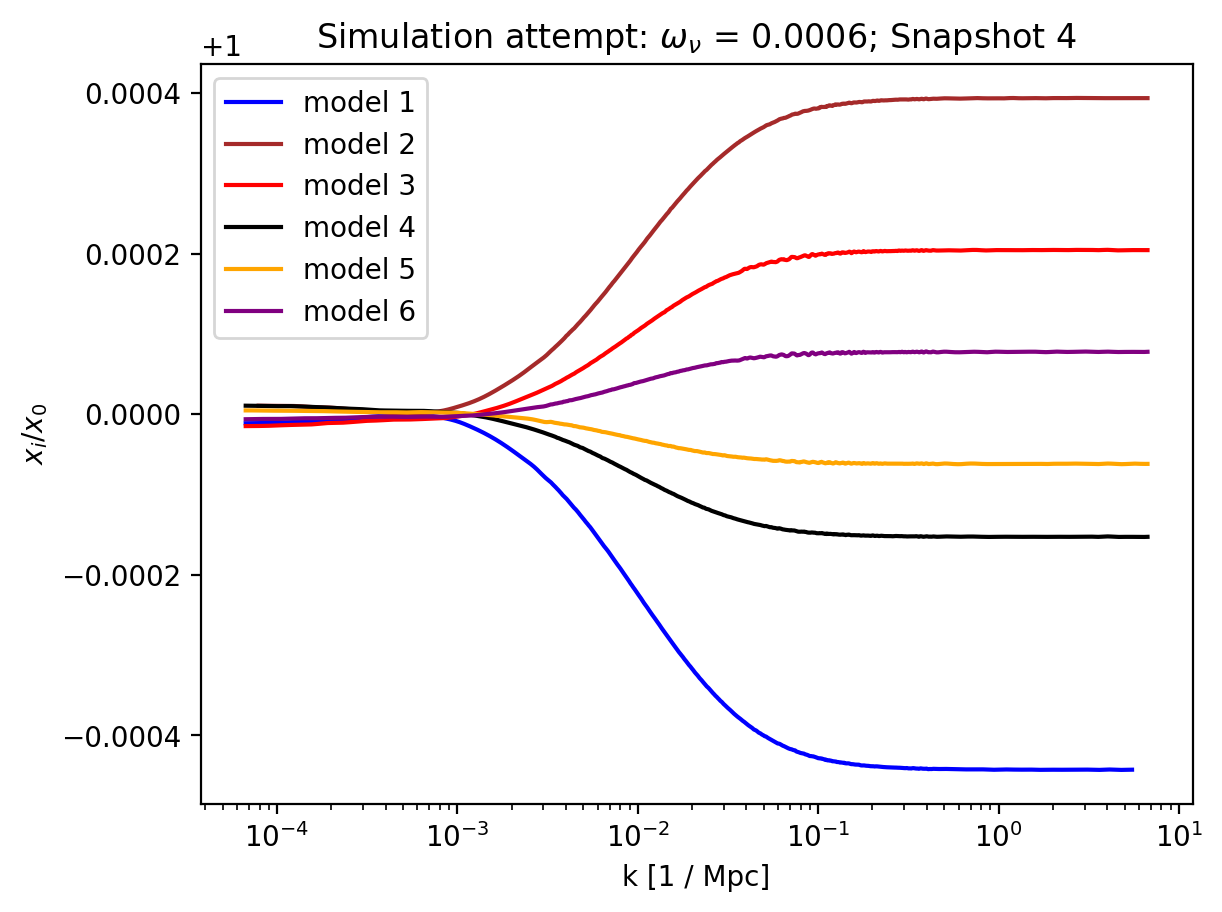

In [5]:
fig, axs = plt.subplots()
spectra.model_ratios_true(
    4, spec_sims[onh2_str], axs, massive='x', skips=[7, 8], omnuh2_str=onh2_str,
    title="Simulation attempt");

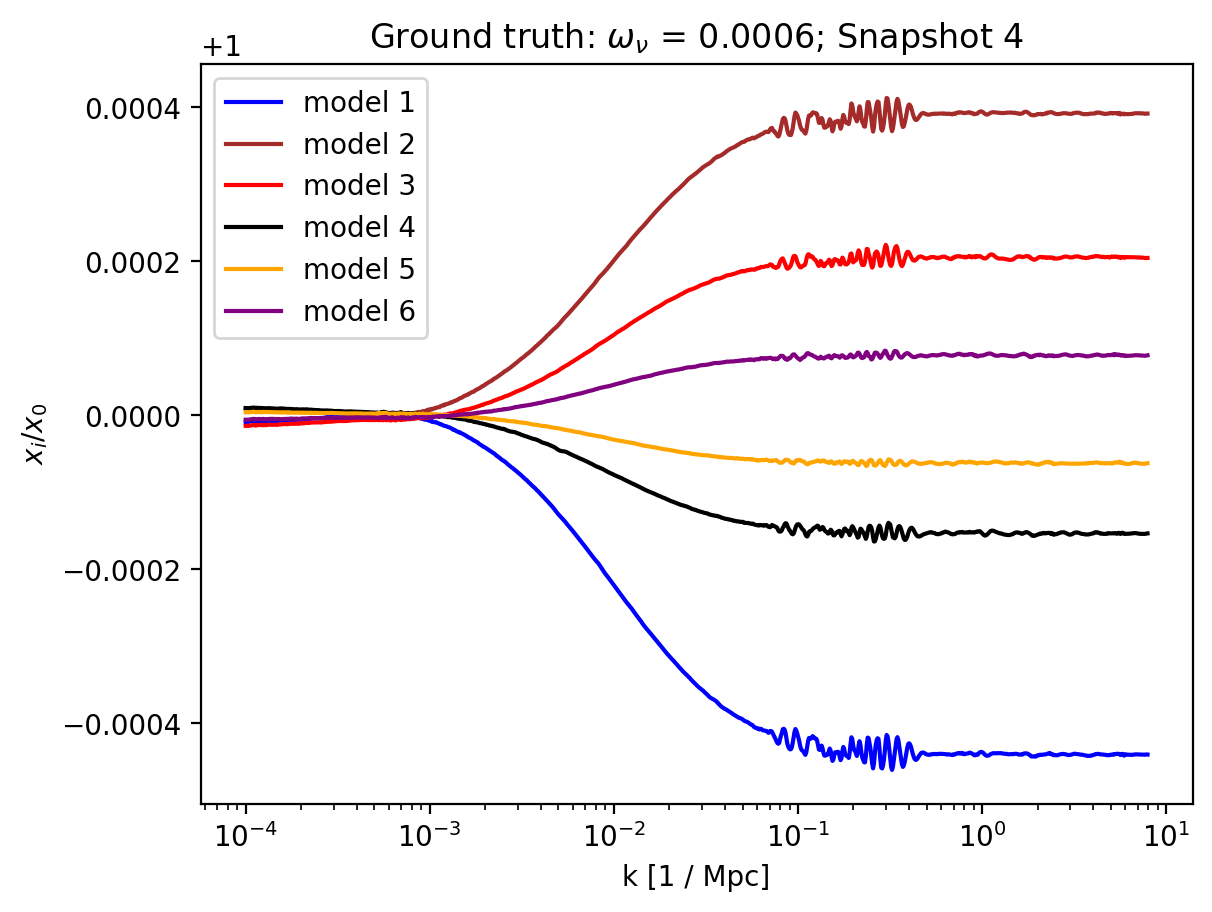

In [6]:
fig, axs = plt.subplots()
spectra.model_ratios_true(4, spectra.powernu[onh2_str], axs,
    massive='x', skips=[7, 8], omnuh2_str=onh2_str);

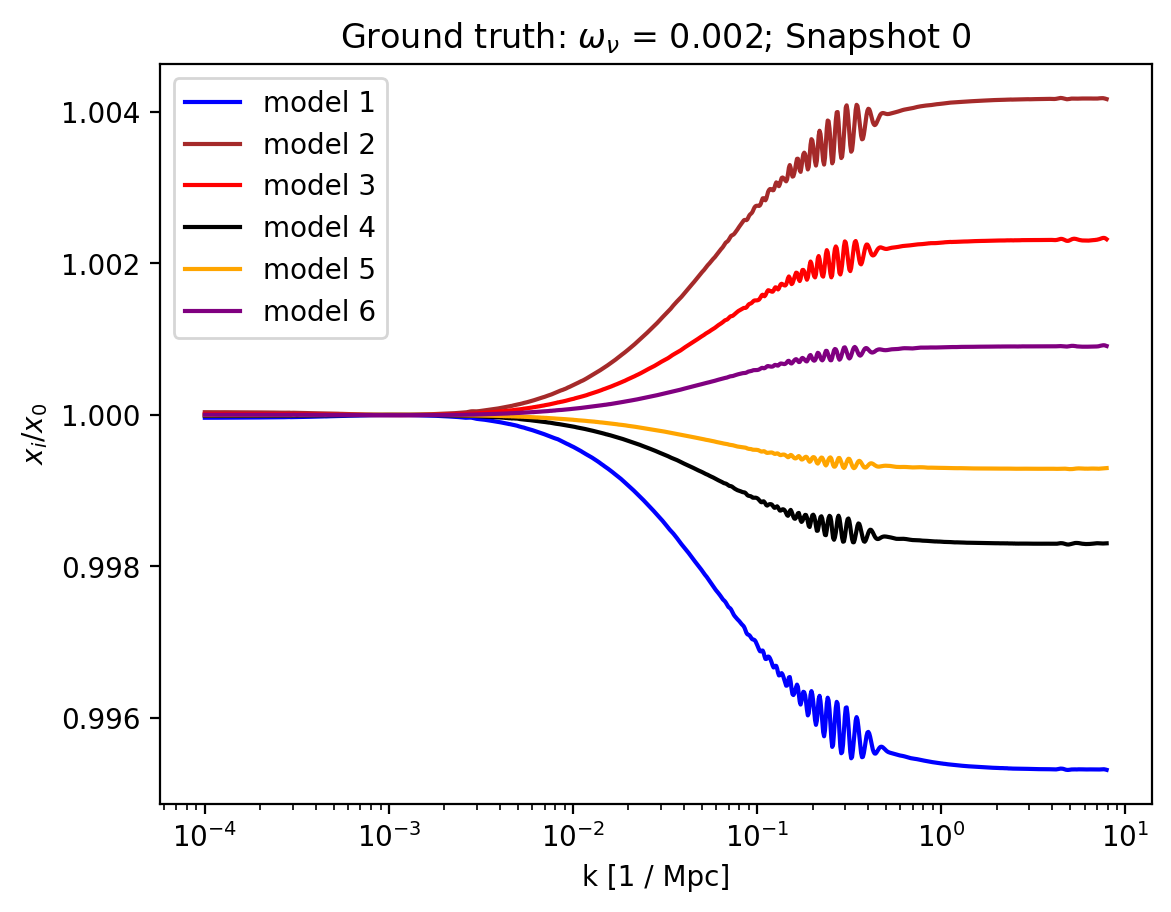

In [20]:
fig, axs = plt.subplots()
ks, rats = spectra.model_ratios_true(0, spectra.powernu2, axs,
    massive='x', skips=[7, 8], omnuh2_str="0.002");

In [21]:
# Be careful with the indexing here; rats[0] is the ratio of model 1 to model 0
true_asymptotes = np.array([rats[i][len(rats[i]) - 1] for i in range(len(rats))])
zc_asymptotes = true_asymptotes - 1

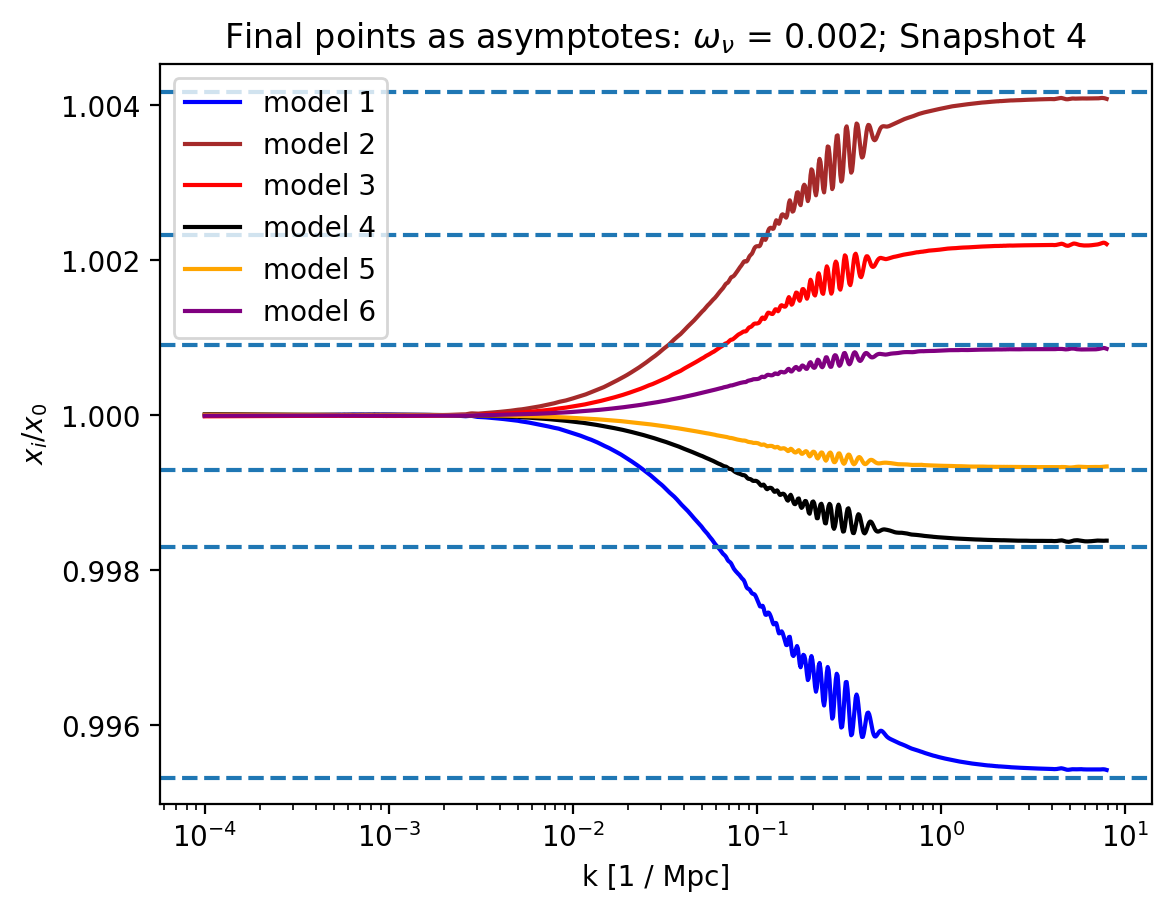

In [35]:
fig, axs = plt.subplots()
spectra.model_ratios_true(4, spectra.powernu2, axs,
    massive='x', skips=[7, 8], omnuh2_str="0.002",
    title="Final points as asymptotes")
for asymptote in true_asymptotes:
    axs.axhline(asymptote, linestyle='--')

0.9730217497565392
42.2107832023125
[0.00074024 0.00073818 0.00072627 0.00072163 0.00071925 0.00072154]


Text(0.5, 1.0, 'Fit results: $\\hat{y} = \\omega_\\nu \\, \\frac{A_s^i}{A_s^0}$')

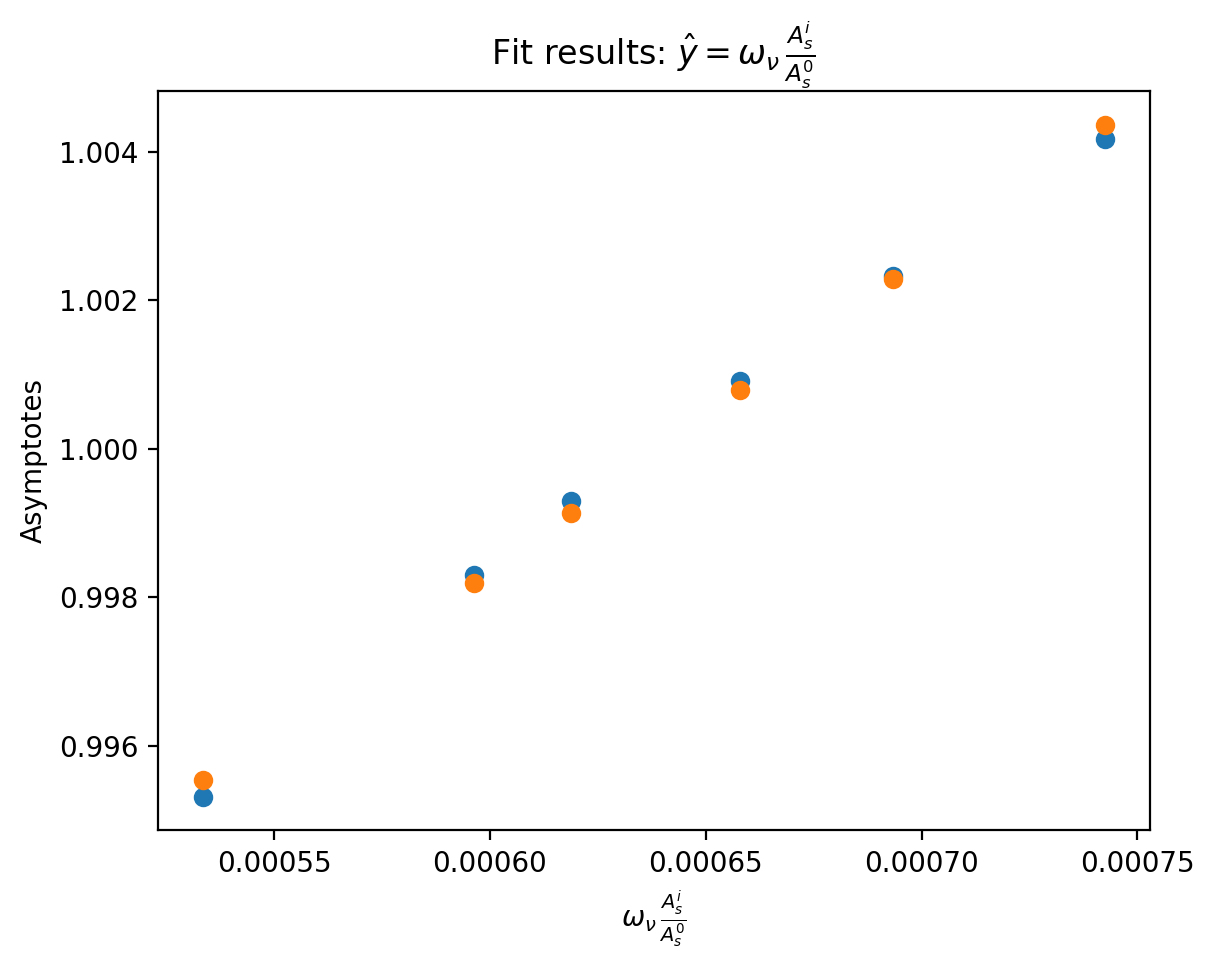

In [23]:
A_s = [spectra.cosm.loc[i]["A_s"] for i in range(7)]
from numpy.polynomial.polynomial import polyfit

x = onh2 * (A_s[1:] / A_s[0])
model_desc = r"\omega_\nu \, \frac{A_s^i}{A_s^0}$"

plt.scatter(x, true_asymptotes)

b, m = polyfit(x, true_asymptotes, 1)
plt.scatter(x, m * x + b)
print(b)
print(m)
print(np.square(true_asymptotes - m * x - 1))

plt.ylabel("Asymptotes")
plt.xlabel("$" + model_desc)
plt.title(r"Fit results: $\hat{y} = " + model_desc)

In [24]:
from sklearn.linear_model import LinearRegression
reg_b0 = LinearRegression()
reg_b0.fit_intercept=False
X = x.reshape(-1, 1)
fit_b0 = reg_b0.fit(X, zc_asymptotes)
m = fit_b0.coef_[0]
b = fit_b0.intercept_
print(m, b)

0.5460792740346996 0.0


In [25]:
reg_b1 = LinearRegression()
reg_b1.fit_intercept=True
X = x.reshape(-1, 1)
fit_b1 = reg_b1.fit(X, zc_asymptotes)
m = fit_b1.coef_[0]
b = fit_b1.intercept_
print(m, b)

42.210783202310736 -0.02697825024345948


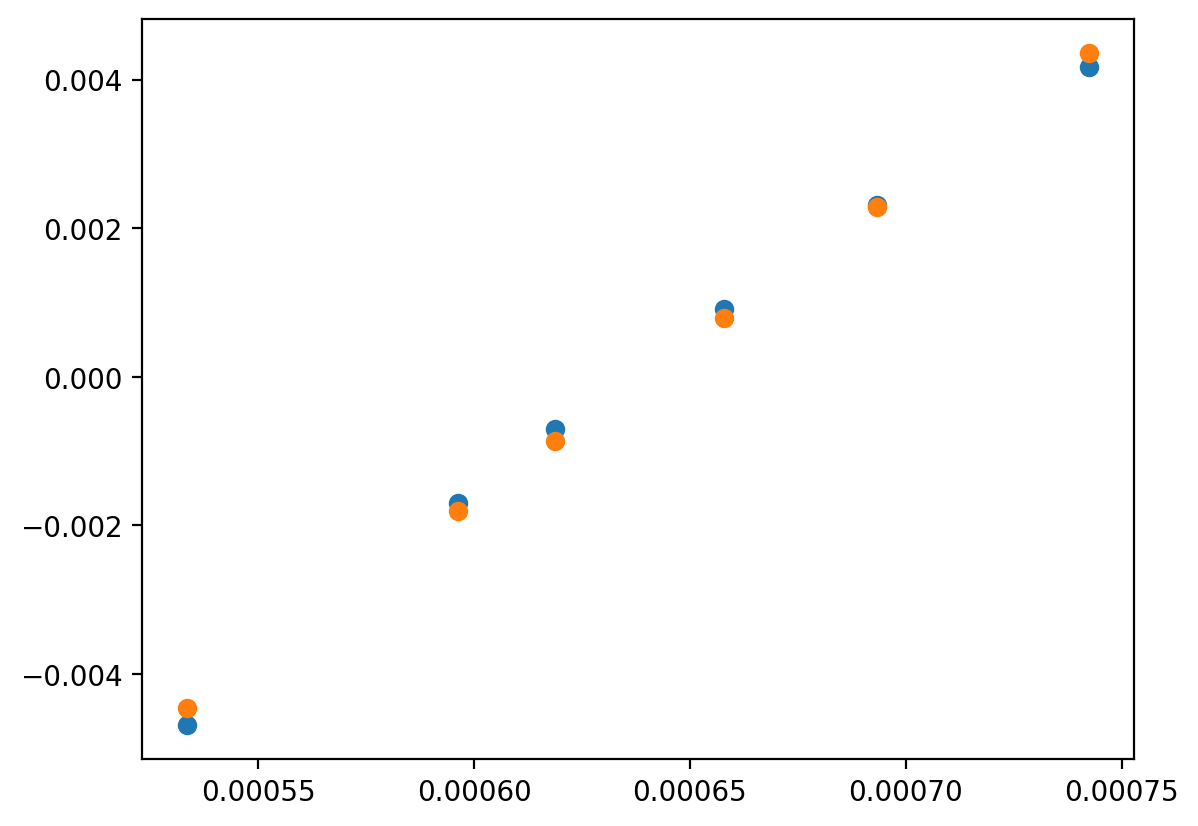

In [26]:
plt.scatter(x, zc_asymptotes)
plt.scatter(x, m * onh2 * (A_s[1:] / A_s[0]) + b)

In [27]:
C = m

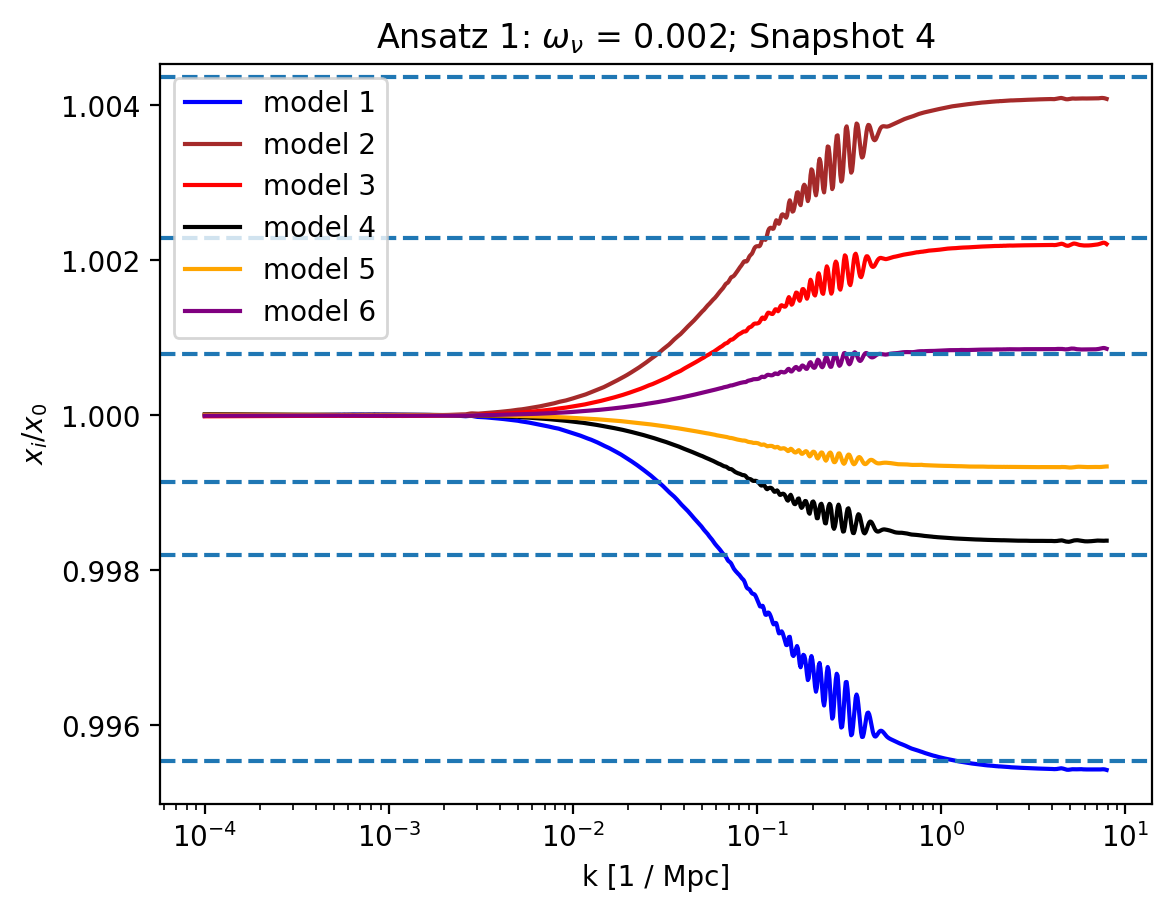

In [34]:
fig, axs = plt.subplots()
spectra.model_ratios_true(4, spectra.powernu2, axs,
    massive='x', skips=[7, 8], omnuh2_str="0.002",
    title="Ansatz 1");
for i in range(len(true_asymptotes)):
    axs.axhline(m * x[i] + b + 1, linestyle='--')

0.9462561523286146
84.44108142425088


Text(0.5, 1.0, 'Fit results: $\\hat{y} = C\\omega_\\nu \\, \\frac{A_s^i}{A_s^0}$')

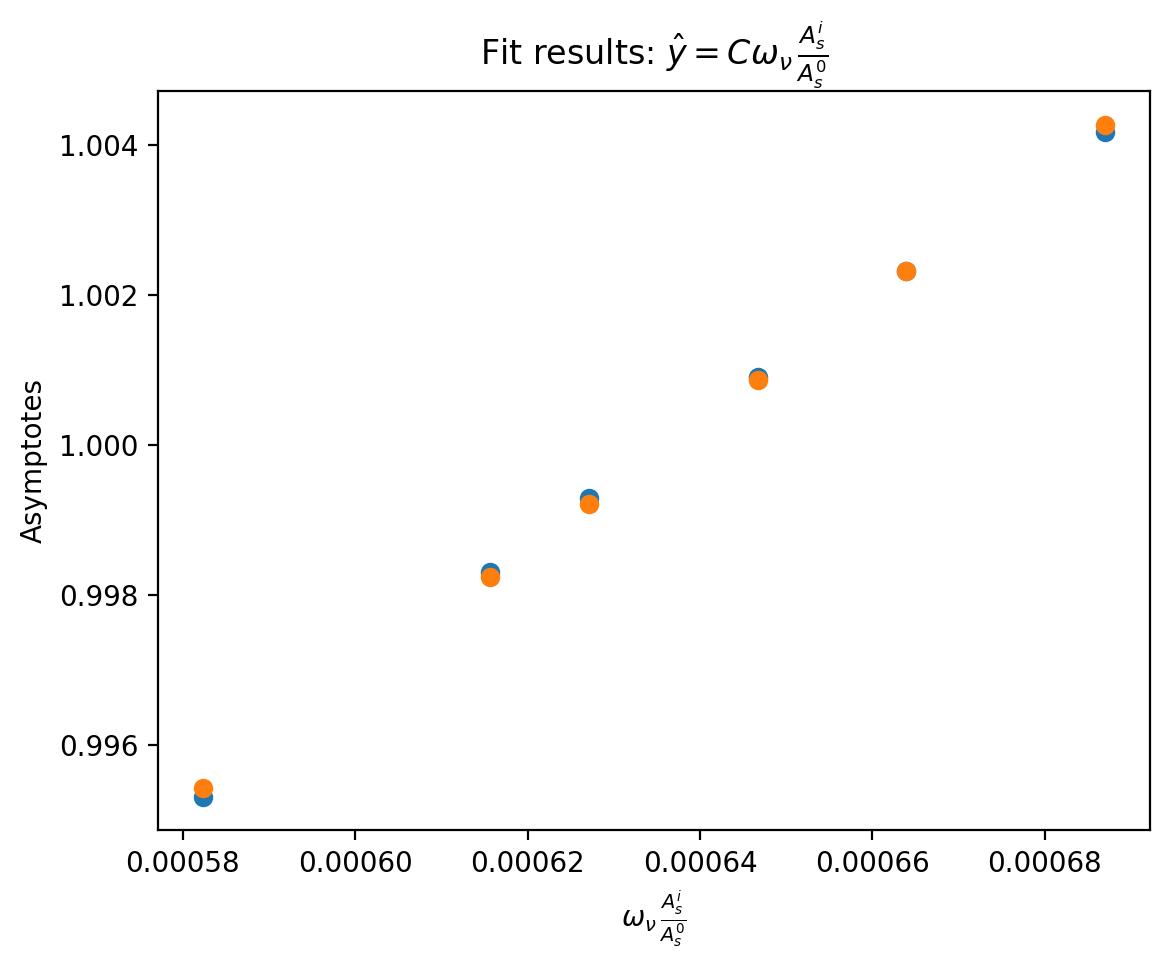

In [29]:
xprime = onh2 * np.sqrt(A_s[1:] / A_s[0])
model_desc_prime = r"\omega_\nu \, \frac{A_s^i}{A_s^0}$"

plt.scatter(xprime, true_asymptotes)

bprime, mprime = polyfit(xprime, true_asymptotes, 1)
plt.scatter(xprime, mprime * xprime + bprime)
print(bprime)
print(mprime)

plt.ylabel("Asymptotes")
plt.xlabel("$" + model_desc_prime)
plt.title(r"Fit results: $\hat{y} = C" + model_desc_prime)

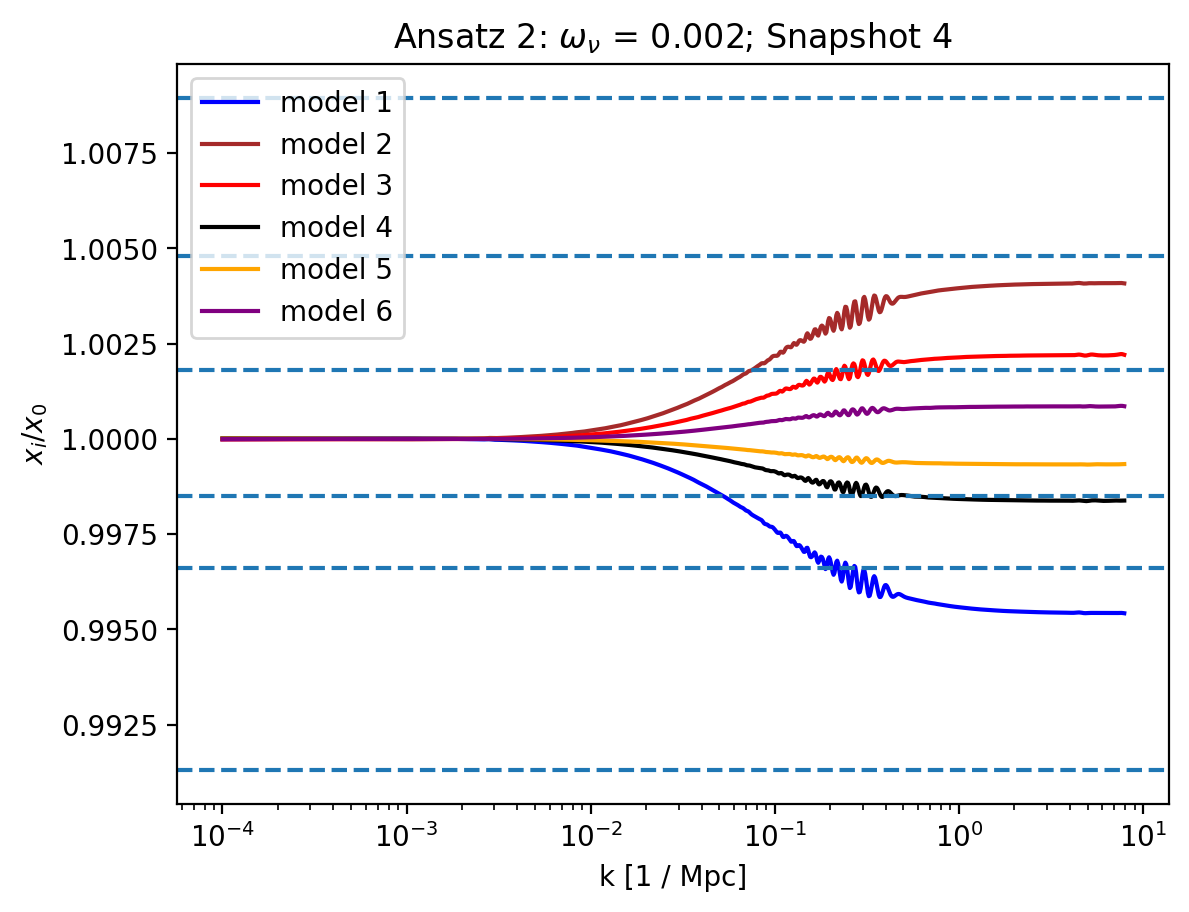

In [33]:
fig, axs = plt.subplots()
spectra.model_ratios_true(4, spectra.powernu2, axs,
    massive='x', skips=[7, 8], omnuh2_str="0.002",
    title="Ansatz 2");

for i in range(len(true_asymptotes)):
    axs.axhline(mprime * xprime[i] + bprime, \
        linestyle='--')

0.9462561523286146
84.44108142425088


Text(0.5, 1.0, 'Fit results: $\\hat{y} = C\\omega_\\nu \\, \\frac{A_s^i}{A_s^0}$')

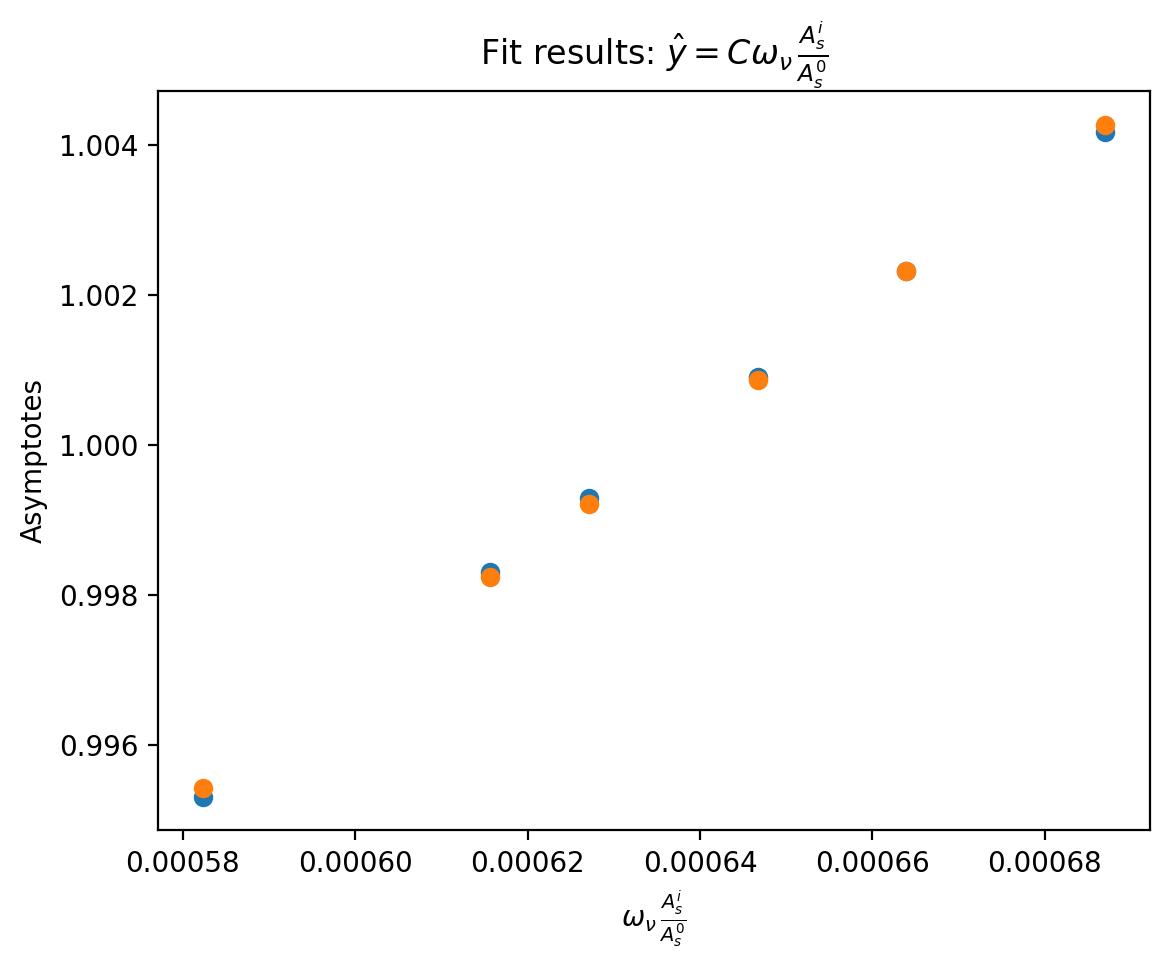

In [31]:
xpp = onh2 * np.sqrt(A_s[1:] / A_s[0])
model_desc_pp = r"\omega_\nu \, \frac{A_s^i}{A_s^0}$"

plt.scatter(xpp, true_asymptotes)

bpp, mpp = polyfit(xpp, true_asymptotes, 1)
plt.scatter(xpp, mpp * xpp + bpp)

print(bpp)
print(mpp)

plt.ylabel("Asymptotes")
plt.xlabel("$" + model_desc_pp)
plt.title(r"Fit results: $\hat{y} = C" + model_desc_pp)

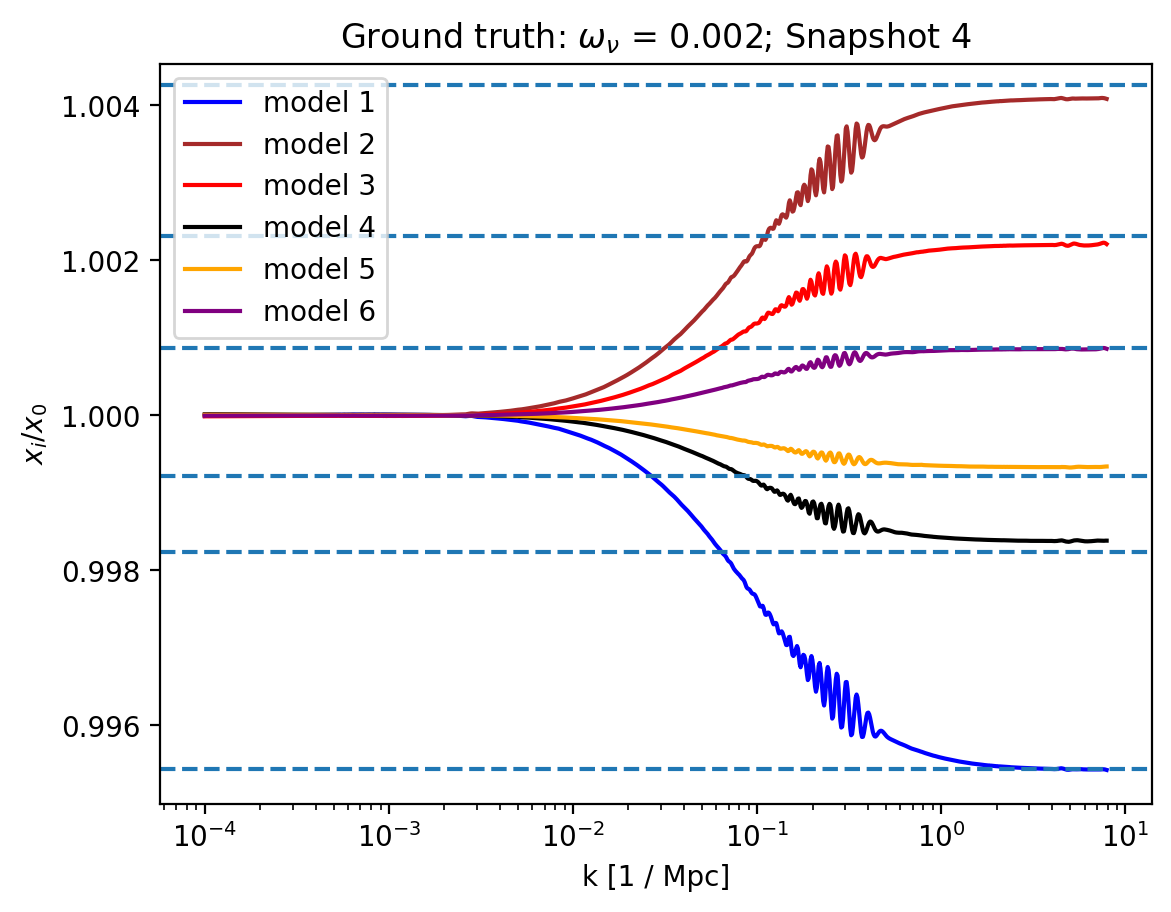

In [32]:
fig, axs = plt.subplots()
spectra.model_ratios_true(4, spectra.powernu2, axs,
    massive='x', skips=[7, 8], omnuh2_str="0.002")
for i in range(len(true_asymptotes)):
    axs.axhline(mpp * xpp[i] + bpp, linestyle='--')

## 